#CHE1147H - Data Mining in Engineering

#Programming assignment - 2

#Student name: **Ashutosh Desai**

#Student number: **1004774041**


##1. Criminal Investigation

###1.1 Introduction

You are a member of the Data Science team in the Crime Investigation Unit of Toronto Police. The incoming and outgoing phone calls of a suspect over a few months period are given to you for analysis. Your manager has asked you to answer the following questions.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
phone_data = pd.read_excel('phone_data.xlsx')
phone_data

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00


###1.2 Most and least frequent outgoing numbers

####1. Identify the 3 numbers with the most counts of outgoing calls.

In [ ]:
out_calls = phone_data[phone_data['Call type'] == 'Outgoing']
out_calls

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
5,10-11-2019,10:25:02 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,20,0
...,...,...,...,...,...,...,...,...
331,10-15-2019,12:14:07 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,29,$0.00
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00


In [ ]:
out_calls['Number called (to/from)'].value_counts()[:3].to_frame() #Counts frequency of each value https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

,Number called (to/from)
A_1,111
A_5,48
B_3,28


The numbers shown in the cell above have most counts of outgoing calls.

####2. Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1 phone call for many numbers) then identify all numbers.

In [ ]:
out_call_counts = out_calls['Number called (to/from)'].value_counts()
out_call_counts[out_call_counts == out_calls['Number called (to/from)'].value_counts().min()].to_frame()

,Number called (to/from)
G_2,1
F_1,1
D_1,1
F_5,1
F_4,1
C_1,1
E_4,1
F_2,1
D_5,1
B_5,1


###1.3 Highest and lowest total duration of outgoing calls

####1. Repeat the same exercise as in the previous subsection, but with the total duration per number called.

In [ ]:
out_calls1 = out_calls.copy()
out_calls1

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
5,10-11-2019,10:25:02 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,20,0
...,...,...,...,...,...,...,...,...
331,10-15-2019,12:14:07 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,29,$0.00
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00


In [ ]:
out_calls1.drop(columns=['Date', 'Start time','From city','Call type','Grand Total','To city'])

,Number called (to/from),Duration
1,A_1,7
2,A_2,1
3,A_2,1
4,A_3,37
5,A_4,20
...,...,...
331,A_1,29
333,A_5,1
334,D_3,9
335,A_4,4


In [ ]:
out_calls_dur = out_calls1.groupby(['Number called (to/from)']).sum().sort_values(by='Duration', ascending=False)

In [ ]:
out_calls_dur

,Duration
Number called (to/from),
A_1,1146
A_5,427
A_4,96
A_3,81
C_4,37
B_3,33
F_2,32
F_1,17
B_5,16


In [ ]:
out_calls_dur[0:3] #3 numbers with maximum call durations

,Duration
Number called (to/from),
A_1,1146
A_5,427
A_4,96


In [ ]:
out_calls_dur[out_calls_dur['Duration'] == out_calls_dur['Duration'].min()] #Numbers with the least call duration

,Duration
Number called (to/from),
D_5,1
E_4,1
E_5,1
C_1,1


###1.4 Location of outgoing calls

####1. What are the number of counts for every location of outgoing calls?

In [ ]:
out_calls

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
5,10-11-2019,10:25:02 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,20,0
...,...,...,...,...,...,...,...,...
331,10-15-2019,12:14:07 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,29,$0.00
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00


In [ ]:
out_calls['From city'].value_counts().to_frame()

,From city
TORONTO ON,244
NEWMARKET ON,2
CLAREMONT ON,1


In [ ]:
out_calls['To city'].value_counts().to_frame()

,To city
TORONTO ON,199
OAK RIDGES ON,28
RICHMONDHL ON,10
THORNHILL ON,3
NEWMARKET ON,1
877 SERV SERV 877 ON,1
STOUFFVL ON,1
888 SERV SERV 888 ON,1
866 SERV SERV 866 ON,1
AURORA ON,1


###1.5 Incoming and Outgoing calls pattern

####1. Calculate the total duration of incoming and outgoing calls per month.

In [ ]:
out_calls['Date'] = pd.to_datetime(out_calls['Date'],infer_datetime_format=True)
out_calls.sort_values(by='Date')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
234,2019-07-21,06:39:25 PM,TORONTO ON,866 SERV SERV 866 ON,F_1,Outgoing,17,0
230,2019-07-22,01:04:32 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,0
232,2019-07-22,11:16:36 AM,TORONTO ON,TORONTO ON,B_3,Outgoing,1,0
221,2019-07-22,11:15:29 PM,TORONTO ON,TORONTO ON,A_4,Outgoing,1,0
222,2019-07-22,06:00:34 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,2,0
...,...,...,...,...,...,...,...,...
247,2019-11-11,12:38:11 PM,TORONTO ON,TORONTO ON,B_3,Outgoing,2,$0.00
242,2019-11-12,09:00:33 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,25,$0.00
240,2019-11-12,12:08:24 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,$0.00
239,2019-11-12,12:17:02 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,2,$0.00


In [ ]:
out_calls_per_month = out_calls.groupby(by=pd.DatetimeIndex(out_calls['Date']).month).agg({'Duration':'sum'})
out_calls_per_month.rename(columns={"Duration": "Duration (Outgoing)","Date": "Month"},inplace=True)
out_calls_per_month

,Duration (Outgoing)
Date,
7,190
8,281
9,714
10,621
11,196


In [ ]:
in_calls = phone_data[phone_data['Call type'] == 'Incoming']
in_calls_per_month = in_calls.groupby(by=pd.DatetimeIndex(in_calls['Date']).month).agg({'Duration':'sum'})
in_calls_per_month.rename(columns={"Duration": "Duration (Incoming)","Date": "Month"},inplace=True)
in_calls_per_month

,Duration (Incoming)
Date,
7,84
8,54
9,244
10,63
11,87


In [ ]:
total_calls_per_month = pd.concat([out_calls_per_month, in_calls_per_month],axis=1)
total_calls_per_month

,Duration (Outgoing),Duration (Incoming)
Date,,
7,190,84
8,281,54
9,714,244
10,621,63
11,196,87


####2. Plot the results in one graph for both incoming and outgoing calls.

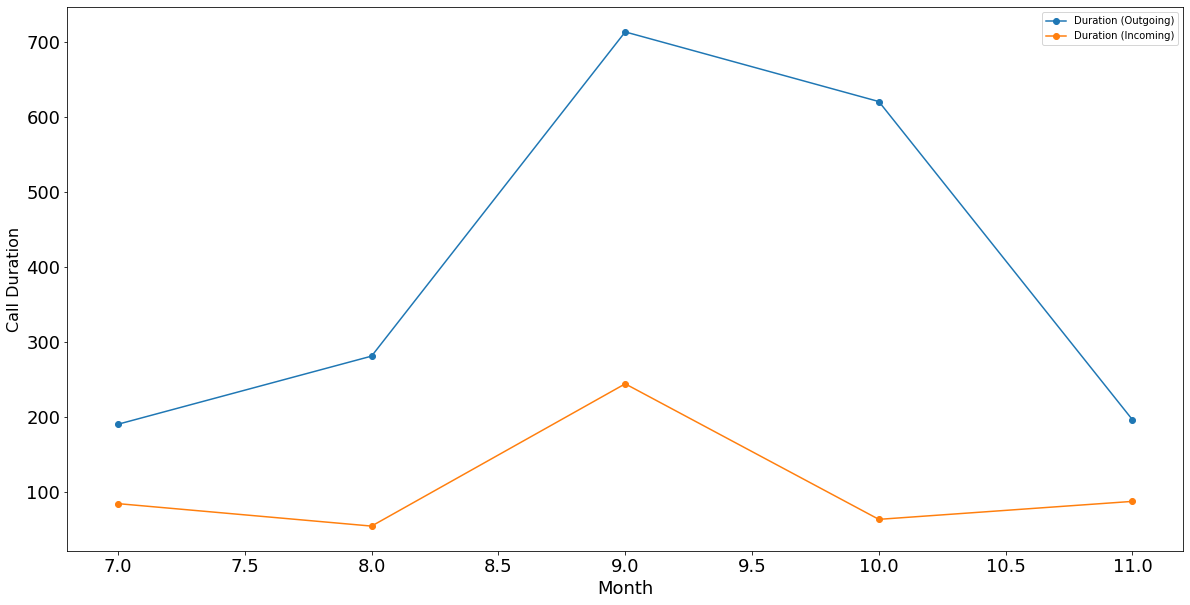

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
fig = plt.figure(figsize=(20,10))
plt.plot(total_calls_per_month.index, total_calls_per_month, '-o')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Call Duration', fontsize=16)
# plt.yscale('symlog')
plt.legend(total_calls_per_month.columns, loc='best')
plt.savefig('Fig_1.5.2_Desai_Ashutosh.png')

####3. Do you see anything unusual in the pattern? E.g. does this look like a phone line that was used for criminal activities or more like a personal phone?


According to the incoming and outgoing call pattern shown in the plot above, it can be inferred that the phone line was used for CRIMINAL ACTIVITY. It can be observed that during the 9th month (September) there is a huge spike in the outgoing and incoming calls. The number of calls and the duration of call to the number 'A-1' is very high as compared to other numbers. 

###1.6 Distribution of calls

####Plot the histogram of the outbound call counts; e.g. x-axis: the call counts per client called, y-axis: number of clients called.

*Note:* An **outbound call**, unlike an inbound call, can be defined as a call that originates with a sales or support representative dialing a third party's telephone number, such as a prospect or customer. (https://aircall.io/blog/call-center/what-is-outbound-call/#:~:text=An%20outbound%20call%2C%20unlike%20an,as%20a%20prospect%20or%20customer.&text=Telemarketing%20sales%20cold%20calls,Marketing%20Research)

In [ ]:
out_calls

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
1,2019-10-13,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,2019-10-13,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,2019-10-13,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,2019-10-11,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
5,2019-10-11,10:25:02 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,20,0
...,...,...,...,...,...,...,...,...
331,2019-10-15,12:14:07 PM,TORONTO ON,TORONTO ON,A_1,Outgoing,29,$0.00
333,2019-10-15,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,2019-10-15,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,2019-10-15,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00


In [ ]:
out_freq = out_calls['Number called (to/from)'].value_counts().to_frame()

In [ ]:
out_freq

,Number called (to/from)
A_1,111
A_5,48
B_3,28
A_4,12
B_2,4
E_3,3
B_4,3
C_4,3
E_1,3
A_3,2


In [ ]:
out_freq.sum()

Number called (to/from)    247
dtype: int64

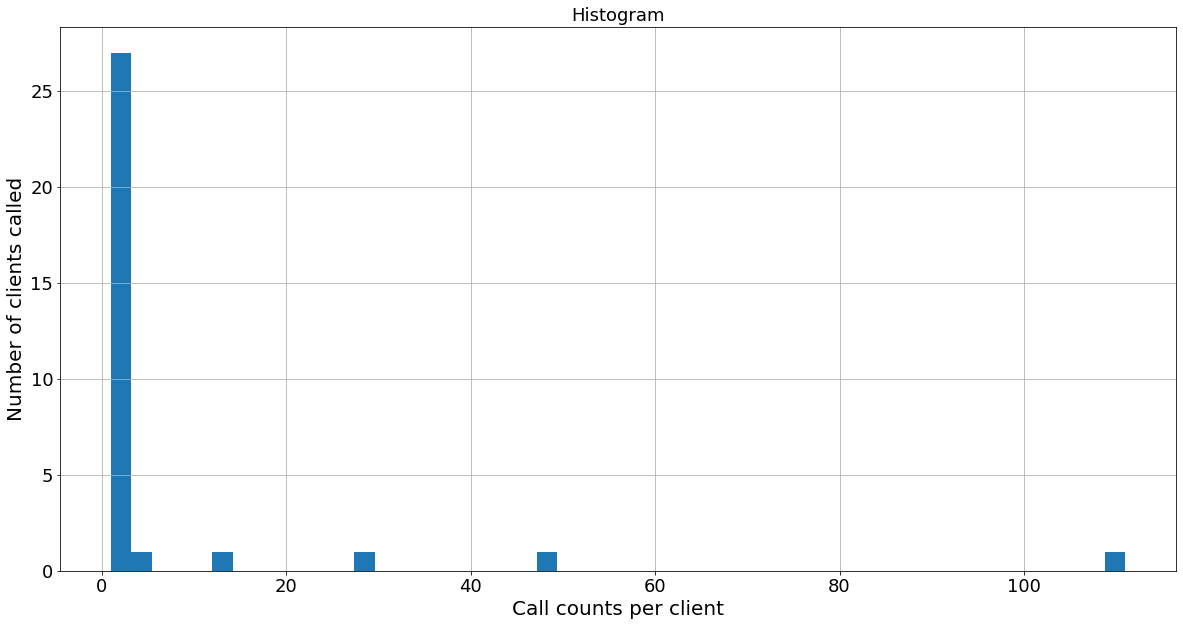

In [ ]:
out_freq.hist(column='Number called (to/from)',bins=50,figsize=(20,10))
plt.title('Histogram',fontsize=18)
plt.xlabel('Call counts per client',fontsize=20)
plt.ylabel('Number of clients called',fontsize=20)
plt.savefig('Fig_1.6_Desai_Ashutosh.png')

##2 The ergodicity problem in economics

###2.1 Introduction

Here, we will reproduce some simulations from a simple gambling experiment used in the recent paper "The ergodicity problem in economics" by Ole Peters (for a simpler description of the problem and its implications refer to the Bloomberg article here). Ergodicity is a term used mainly in equilibrium statistical mechanics and in many other areas including economics. A process is called ergodic if the time average and the expectation value are equal. The author, a physicist who specializes in statistical mechanics, claims that its use in economics is abusive and it has led to the narrative of human irrationality.

###2.2 The statistical problem

Starting with an initial wealth of 100$, you engage into a simple coin-flipping game in which your wealth increases by 50% every time you flip heads and you lose 40% if you flip tails. Since tossing heads or tails is just as likely, it makes sense to accept such a game if you play enough times because your potential gain is larger than your potential loss each time you play. Yet, as we will see this is a paradox.

###2.3 Coding the problem

Below is a description of a simple set of steps you can follow to code this problem. It is not optimal for computation, but it is simple to understand the steps. If you want to follow a different logic


####1. Generate a pandas dataframe that simulates N coin tosses for w gamblers with the np.random.rand function. Set N=100 coin tosses and w=100 gamblers and add the prefix 'prob_' to the column name.

In [ ]:
# w = gamblers(ROWS) & N = coin tosses(COLUMNS)
N=100 #columns
w=100 #rows
gamble_prob_data = np.random.rand(w,N)
gamble_prob_data.shape

(100, 100)

In [ ]:
gamble_df = pd.DataFrame(data=gamble_prob_data, index=None, columns=None, dtype=None, copy=False)
#gamble_df.add_prefix('prob_')
gamble_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.109036,0.223352,0.751437,0.478376,0.547467,0.922942,0.601556,0.773031,0.167843,0.997238,0.493178,0.930702,0.442967,0.049966,0.187614,0.090611,0.245667,0.812342,0.853299,0.345454,0.994040,0.851772,0.420442,0.195644,0.235441,0.942016,0.731680,0.208539,0.930693,0.379109,0.122526,0.345972,0.591110,0.882238,0.257062,0.887342,0.292709,0.317383,0.663268,0.616346,...,0.850834,0.268700,0.739400,0.735076,0.542705,0.396469,0.613269,0.744883,0.039977,0.816490,0.234198,0.315288,0.046663,0.989839,0.621573,0.066619,0.012046,0.968378,0.579040,0.563495,0.873274,0.383084,0.077310,0.425353,0.252579,0.803261,0.530697,0.086123,0.865226,0.820459,0.478748,0.929211,0.414248,0.222170,0.172447,0.768999,0.672382,0.497583,0.305639,0.573413
1,0.541664,0.092484,0.079139,0.429011,0.499918,0.357663,0.934783,0.208199,0.617422,0.522571,0.320351,0.034191,0.440095,0.691038,0.568974,0.005848,0.879248,0.781677,0.629267,0.141650,0.444117,0.114656,0.106645,0.234375,0.673669,0.886759,0.214229,0.647152,0.667035,0.335345,0.627439,0.305836,0.805293,0.012866,0.097764,0.798565,0.028884,0.195004,0.126607,0.568876,...,0.082681,0.449985,0.111191,0.590376,0.726616,0.606697,0.211484,0.841028,0.128163,0.285307,0.398547,0.177408,0.526663,0.863775,0.744225,0.606669,0.889019,0.912617,0.942651,0.179035,0.348961,0.703084,0.702289,0.934154,0.342731,0.236831,0.041726,0.383558,0.577527,0.054736,0.721412,0.377942,0.975032,0.751875,0.737305,0.735818,0.372742,0.409703,0.875404,0.459668
2,0.604297,0.335973,0.722199,0.585888,0.157132,0.391932,0.074203,0.195341,0.493835,0.693785,0.699395,0.605712,0.867397,0.659199,0.063897,0.270298,0.329619,0.086876,0.198457,0.058973,0.266360,0.841251,0.807754,0.537930,0.037043,0.237808,0.810665,0.709933,0.449015,0.377799,0.137541,0.016578,0.448471,0.951400,0.161879,0.350343,0.921090,0.930082,0.375806,0.628115,...,0.731360,0.019326,0.086269,0.373295,0.501554,0.831143,0.462599,0.277746,0.249513,0.561664,0.782713,0.978180,0.262972,0.205766,0.254410,0.895522,0.275954,0.381779,0.442175,0.210429,0.591739,0.391533,0.462983,0.808063,0.973777,0.152910,0.393074,0.594402,0.644837,0.084331,0.882670,0.136592,0.113135,0.500595,0.563612,0.350103,0.944532,0.826773,0.836128,0.575270
3,0.901899,0.528382,0.632446,0.551644,0.264060,0.625885,0.858035,0.655731,0.217523,0.277653,0.749229,0.564923,0.647570,0.259311,0.311736,0.290965,0.199816,0.972873,0.682172,0.552795,0.013424,0.586869,0.918863,0.326444,0.162326,0.459025,0.615426,0.352858,0.114148,0.468226,0.693614,0.146739,0.028833,0.302314,0.159743,0.668867,0.769133,0.120572,0.544510,0.329747,...,0.690383,0.743495,0.181158,0.026005,0.585991,0.983627,0.568211,0.606217,0.108411,0.173734,0.661848,0.549701,0.203485,0.046989,0.910341,0.304076,0.169101,0.226159,0.967662,0.441238,0.930788,0.557275,0.814568,0.381023,0.003024,0.967668,0.735496,0.818569,0.284708,0.052244,0.086530,0.502931,0.930596,0.223105,0.459341,0.068964,0.033579,0.125570,0.514013,0.722631
4,0.159494,0.662569,0.207756,0.664558,0.174361,0.871085,0.667715,0.392060,0.529092,0.893574,0.667708,0.570431,0.016283,0.110536,0.845215,0.787310,0.525959,0.571306,0.443171,0.388434,0.490397,0.698877,0.663330,0.544417,0.514980,0.484342,0.182622,0.986714,0.406461,0.755266,0.542333,0.575841,0.165689,0.404303,0.679949,0.944536,0.809282,0.988664,0.349486,0.875671,...,0.437543,0.625990,0.699449,0.906214,0.699914,0.013445,0.640299,0.408917,0.416667,0.701523,0.791139,0.966595,0.486568,0.748503,0.400325,0.577199,0.335586,0.856824,0.385902,0.325887,0.507549,0.057878,0.614021,0.979532,0.791299,0.980418,0.727426,0.010069,0.936443,0.612467,0.141224,0.564440,0.651106,0.195694,0.334645,0.061075,0.323887,0.975820,0.781924,0.974496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
gamble_df.add_prefix('prob_')

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20,prob_21,prob_22,prob_23,prob_24,prob_25,prob_26,prob_27,prob_28,prob_29,prob_30,prob_31,prob_32,prob_33,prob_34,prob_35,prob_36,prob_37,prob_38,prob_39,...,prob_60,prob_61,prob_62,prob_63,prob_64,prob_65,prob_66,prob_67,prob_68,prob_69,prob_70,prob_71,prob_72,prob_73,prob_74,prob_75,prob_76,prob_77,prob_78,prob_79,prob_80,prob_81,prob_82,prob_83,prob_84,prob_85,prob_86,prob_87,prob_88,prob_89,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.109036,0.223352,0.751437,0.478376,0.547467,0.922942,0.601556,0.773031,0.167843,0.997238,0.493178,0.930702,0.442967,0.049966,0.187614,0.090611,0.245667,0.812342,0.853299,0.345454,0.994040,0.851772,0.420442,0.195644,0.235441,0.942016,0.731680,0.208539,0.930693,0.379109,0.122526,0.345972,0.591110,0.882238,0.257062,0.887342,0.292709,0.317383,0.663268,0.616346,...,0.850834,0.268700,0.739400,0.735076,0.542705,0.396469,0.613269,0.744883,0.039977,0.816490,0.234198,0.315288,0.046663,0.989839,0.621573,0.066619,0.012046,0.968378,0.579040,0.563495,0.873274,0.383084,0.077310,0.425353,0.252579,0.803261,0.530697,0.086123,0.865226,0.820459,0.478748,0.929211,0.414248,0.222170,0.172447,0.768999,0.672382,0.497583,0.305639,0.573413
1,0.541664,0.092484,0.079139,0.429011,0.499918,0.357663,0.934783,0.208199,0.617422,0.522571,0.320351,0.034191,0.440095,0.691038,0.568974,0.005848,0.879248,0.781677,0.629267,0.141650,0.444117,0.114656,0.106645,0.234375,0.673669,0.886759,0.214229,0.647152,0.667035,0.335345,0.627439,0.305836,0.805293,0.012866,0.097764,0.798565,0.028884,0.195004,0.126607,0.568876,...,0.082681,0.449985,0.111191,0.590376,0.726616,0.606697,0.211484,0.841028,0.128163,0.285307,0.398547,0.177408,0.526663,0.863775,0.744225,0.606669,0.889019,0.912617,0.942651,0.179035,0.348961,0.703084,0.702289,0.934154,0.342731,0.236831,0.041726,0.383558,0.577527,0.054736,0.721412,0.377942,0.975032,0.751875,0.737305,0.735818,0.372742,0.409703,0.875404,0.459668
2,0.604297,0.335973,0.722199,0.585888,0.157132,0.391932,0.074203,0.195341,0.493835,0.693785,0.699395,0.605712,0.867397,0.659199,0.063897,0.270298,0.329619,0.086876,0.198457,0.058973,0.266360,0.841251,0.807754,0.537930,0.037043,0.237808,0.810665,0.709933,0.449015,0.377799,0.137541,0.016578,0.448471,0.951400,0.161879,0.350343,0.921090,0.930082,0.375806,0.628115,...,0.731360,0.019326,0.086269,0.373295,0.501554,0.831143,0.462599,0.277746,0.249513,0.561664,0.782713,0.978180,0.262972,0.205766,0.254410,0.895522,0.275954,0.381779,0.442175,0.210429,0.591739,0.391533,0.462983,0.808063,0.973777,0.152910,0.393074,0.594402,0.644837,0.084331,0.882670,0.136592,0.113135,0.500595,0.563612,0.350103,0.944532,0.826773,0.836128,0.575270
3,0.901899,0.528382,0.632446,0.551644,0.264060,0.625885,0.858035,0.655731,0.217523,0.277653,0.749229,0.564923,0.647570,0.259311,0.311736,0.290965,0.199816,0.972873,0.682172,0.552795,0.013424,0.586869,0.918863,0.326444,0.162326,0.459025,0.615426,0.352858,0.114148,0.468226,0.693614,0.146739,0.028833,0.302314,0.159743,0.668867,0.769133,0.120572,0.544510,0.329747,...,0.690383,0.743495,0.181158,0.026005,0.585991,0.983627,0.568211,0.606217,0.108411,0.173734,0.661848,0.549701,0.203485,0.046989,0.910341,0.304076,0.169101,0.226159,0.967662,0.441238,0.930788,0.557275,0.814568,0.381023,0.003024,0.967668,0.735496,0.818569,0.284708,0.052244,0.086530,0.502931,0.930596,0.223105,0.459341,0.068964,0.033579,0.125570,0.514013,0.722631
4,0.159494,0.662569,0.207756,0.664558,0.174361,0.871085,0.667715,0.392060,0.529092,0.893574,0.667708,0.570431,0.016283,0.110536,0.845215,0.787310,0.525959,0.571306,0.443171,0.388434,0.490397,0.698877,0.663330,0.544417,0.514980,0.484342,0.182622,0.986714,0.406461,0.755266,0.542333,0.575841,0.165689,0.404303,0.679949,0.944536,0.809282,0.988664,0.349486,0.875671,...,0.437543,0.625990,0.699449,0.906214,0.699914,0.013445,0.640299,0.408917,0.416667,0.701523,0.791

####2. Initialize an additional w columns ['balance ' + str(x] with the value 100 to capture the initial wealth of 100$, where: x in range(0, w).

In [ ]:
initial_wealth = np.full((100, 1), 100)
balance_data = pd.DataFrame(data=initial_wealth,columns=['0'])
balance_data

,0
0,100
1,100
2,100
3,100
4,100
...,...
95,100
96,100
97,100
98,100


In [ ]:
gamble_df[0][1]

0.5416640663462364

In [ ]:
gamble_df.iloc[4,9]

0.8935738347652992

####3. Create a two-level for loop that iterates through rows 1 to N first and columns w to 2*w next implementing the calculation logic for every prob-balance pair:

In [ ]:
for toss in range(0,100):
  temp_list = []
  for gambler in range(0,100):
    if gamble_df.iloc[gambler,toss] < 0.5:
      temp_list.append(balance_data.iloc[gambler,toss]*0.6)
    else:
      temp_list.append(balance_data.iloc[gambler,toss]*1.5)
  
  balance_data[str(toss+1)] = temp_list



In [ ]:
balance_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,100,60.0,36.0,54.0,32.40,48.600,72.900,109.3500,164.02500,98.415000,147.622500,88.573500,132.860250,79.716150,47.829690,28.697814,17.218688,10.331213,15.496820,23.245229,13.947138,20.920706,31.381060,18.828636,11.297181,6.778309,10.167463,15.251195,9.150717,13.726075,8.235645,4.941387,2.964832,4.447248,6.670873,4.002524,6.003785,3.602271,2.161363,3.242044,...,6.358674,3.815204,5.722806,8.584210,12.876314,7.725789,11.588683,17.383024,10.429815,15.644722,9.386833,5.632100,3.379260,5.068890,7.603335,4.562001,2.737201,4.105801,6.158701,9.238052,13.857078,8.314247,4.988548,2.993129,1.795877,2.693816,4.040724,2.424434,3.636651,5.454977,3.272986,4.909480,2.945688,1.767413,1.060448,1.590671,2.386007,1.431604,0.858963,1.288444
1,100,150.0,90.0,54.0,32.40,19.440,11.664,17.4960,10.49760,15.746400,23.619600,14.171760,8.503056,5.101834,7.652750,11.479126,6.887475,10.331213,15.496820,23.245229,13.947138,8.368283,5.020970,3.012582,1.807549,2.711324,4.066985,2.440191,3.660287,5.490430,3.294258,4.941387,2.964832,4.447248,2.668349,1.601009,2.401514,1.440908,0.864545,0.518727,...,0.065113,0.039068,0.023441,0.035161,0.052741,0.079112,0.047467,0.071201,0.042721,0.025632,0.015379,0.009228,0.013841,0.020762,0.031143,0.046715,0.070072,0.105109,0.157663,0.094598,0.056759,0.085138,0.127707,0.191560,0.114936,0.068962,0.041377,0.024826,0.037239,0.022344,0.033515,0.020109,0.030164,0.045246,0.067869,0.101803,0.061082,0.036649,0.054974,0.032984
2,100,150.0,90.0,135.0,202.50,121.500,72.900,43.7400,26.24400,15.746400,23.619600,35.429400,53.144100,79.716150,119.574225,71.744535,43.046721,25.828033,15.496820,9.298092,5.578855,3.347313,5.020970,7.531454,11.297181,6.778309,4.066985,6.100478,9.150717,5.490430,3.294258,1.976555,1.185933,0.711560,1.067340,0.640404,0.384242,0.576363,0.864545,0.518727,...,1.017388,0.610433,0.366260,0.219756,0.329634,0.494450,0.296670,0.178002,0.106801,0.160202,0.240303,0.360454,0.216273,0.129764,0.077858,0.116787,0.070072,0.042043,0.025226,0.015136,0.022703,0.013622,0.008173,0.012260,0.018390,0.011034,0.006620,0.009930,0.014896,0.008937,0.013406,0.008044,0.004826,0.007239,0.010859,0.006515,0.009773,0.014660,0.021989,0.032984
3,100,150.0,225.0,337.5,506.25,303.750,455.625,683.4375,1025.15625,615.093750,369.056250,553.584375,830.376562,1245.564844,747.338906,448.403344,269.042006,161.425204,242.137806,363.206708,544.810063,326.886038,490.329056,735.493585,441.296151,264.777690,158.866614,238.299921,142.979953,85.787972,51.472783,77.209175,46.325505,27.795303,16.677182,10.006309,15.009464,22.514195,13.508517,20.262776,...,99.354277,149.031416,89.418849,53.651310,80.476965,120.715447,181.073170,271.609755,162.965853,97.779512,146.669268,220.003902,132.002341,79.201405,118.802107,71.281264,42.768759,25.661255,38.491883,23.095130,34.642694,51.964042,77.946062,46.767637,28.060582,42.090874,63.136311,94.704466,56.822679,34.093608,20.456165,30.684247,46.026370,27.615822,16.569493,9.941696,5.965018,3.579011,5.368516,8.052774
4,100,60.0,90.0,54.0,81.00,48.600,72.900,109.3500,65.61000,98.415000,147.622500,221.433750,332.150625,199.290375,119.574225,179.361337,269.042006,403.563009,605.344514,363.206708,217.924025,130.754415,196.131623,294.197434,441.296151,661.944226,397.166536,238.299921,357.449882,214.469929,321.704894,482.557341,723.836011,434.301607,260.580964,390.871446,586.307169,879.460754,1319.191131,791.514678,...,248.385693,372.578540,558.867809,838.301714,1257.452571,754.471543,1131.707314,679.024388,407.414633,611.121949,916.682924,1375.024386,825.014632,1237.521948,742.513169,1113.769753,668.261852,1002.392778,601.435667,360.861400,541.292100,324.775260,487.162890,730.744335,1096.116502,1644.174753,2466.262130,1479.757278,2219.635917,3329.453876,1997.672325,2996.508488,4494.762732,2696.857639,1618.11

In [ ]:
balance_data.add_prefix('balance_')

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,balance_10,balance_11,balance_12,balance_13,balance_14,balance_15,balance_16,balance_17,balance_18,balance_19,balance_20,balance_21,balance_22,balance_23,balance_24,balance_25,balance_26,balance_27,balance_28,balance_29,balance_30,balance_31,balance_32,balance_33,balance_34,balance_35,balance_36,balance_37,balance_38,balance_39,...,balance_61,balance_62,balance_63,balance_64,balance_65,balance_66,balance_67,balance_68,balance_69,balance_70,balance_71,balance_72,balance_73,balance_74,balance_75,balance_76,balance_77,balance_78,balance_79,balance_80,balance_81,balance_82,balance_83,balance_84,balance_85,balance_86,balance_87,balance_88,balance_89,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99,balance_100
0,100,60.0,36.0,54.0,32.40,48.600,72.900,109.3500,164.02500,98.415000,147.622500,88.573500,132.860250,79.716150,47.829690,28.697814,17.218688,10.331213,15.496820,23.245229,13.947138,20.920706,31.381060,18.828636,11.297181,6.778309,10.167463,15.251195,9.150717,13.726075,8.235645,4.941387,2.964832,4.447248,6.670873,4.002524,6.003785,3.602271,2.161363,3.242044,...,6.358674,3.815204,5.722806,8.584210,12.876314,7.725789,11.588683,17.383024,10.429815,15.644722,9.386833,5.632100,3.379260,5.068890,7.603335,4.562001,2.737201,4.105801,6.158701,9.238052,13.857078,8.314247,4.988548,2.993129,1.795877,2.693816,4.040724,2.424434,3.636651,5.454977,3.272986,4.909480,2.945688,1.767413,1.060448,1.590671,2.386007,1.431604,0.858963,1.288444
1,100,150.0,90.0,54.0,32.40,19.440,11.664,17.4960,10.49760,15.746400,23.619600,14.171760,8.503056,5.101834,7.652750,11.479126,6.887475,10.331213,15.496820,23.245229,13.947138,8.368283,5.020970,3.012582,1.807549,2.711324,4.066985,2.440191,3.660287,5.490430,3.294258,4.941387,2.964832,4.447248,2.668349,1.601009,2.401514,1.440908,0.864545,0.518727,...,0.065113,0.039068,0.023441,0.035161,0.052741,0.079112,0.047467,0.071201,0.042721,0.025632,0.015379,0.009228,0.013841,0.020762,0.031143,0.046715,0.070072,0.105109,0.157663,0.094598,0.056759,0.085138,0.127707,0.191560,0.114936,0.068962,0.041377,0.024826,0.037239,0.022344,0.033515,0.020109,0.030164,0.045246,0.067869,0.101803,0.061082,0.036649,0.054974,0.032984
2,100,150.0,90.0,135.0,202.50,121.500,72.900,43.7400,26.24400,15.746400,23.619600,35.429400,53.144100,79.716150,119.574225,71.744535,43.046721,25.828033,15.496820,9.298092,5.578855,3.347313,5.020970,7.531454,11.297181,6.778309,4.066985,6.100478,9.150717,5.490430,3.294258,1.976555,1.185933,0.711560,1.067340,0.640404,0.384242,0.576363,0.864545,0.518727,...,1.017388,0.610433,0.366260,0.219756,0.329634,0.494450,0.296670,0.178002,0.106801,0.160202,0.240303,0.360454,0.216273,0.129764,0.077858,0.116787,0.070072,0.042043,0.025226,0.015136,0.022703,0.013622,0.008173,0.012260,0.018390,0.011034,0.006620,0.009930,0.014896,0.008937,0.013406,0.008044,0.004826,0.007239,0.010859,0.006515,0.009773,0.014660,0.021989,0.032984
3,100,150.0,225.0,337.5,506.25,303.750,455.625,683.4375,1025.15625,615.093750,369.056250,553.584375,830.376562,1245.564844,747.338906,448.403344,269.042006,161.425204,242.137806,363.206708,544.810063,326.886038,490.329056,735.493585,441.296151,264.777690,158.866614,238.299921,142.979953,85.787972,51.472783,77.209175,46.325505,27.795303,16.677182,10.006309,15.009464,22.514195,13.508517,20.262776,...,99.354277,149.031416,89.418849,53.651310,80.476965,120.715447,181.073170,271.609755,162.965853,97.779512,146.669268,220.003902,132.002341,79.201405,118.802107,71.281264,42.768759,25.661255,38.491883,23.095130,34.642694,51.964042,77.946062,46.767637,28.060582,42.090874,63.136311,94.704466,56.822679,34.093608,20.456165,30.684247,46.026370,27.615822,16.569493,9.941696,5.965018,3.579011,5.368516,8.052774
4,100,60.0,90.0,54.0,81.00,48.600,72.900,109.3500,65.61000,98.415000,147.622500,221.433750,332.150625,199.290375,119.574225,179.361337,269.042006,403.563009,605.

####4. Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculate how many gamblers have more than their initial 100. What happens when you increase N to 1,000 (Figure 2 in the original paper, except the red and blue line)? How many gamblers with more than 100$ do you have at t=1,000?

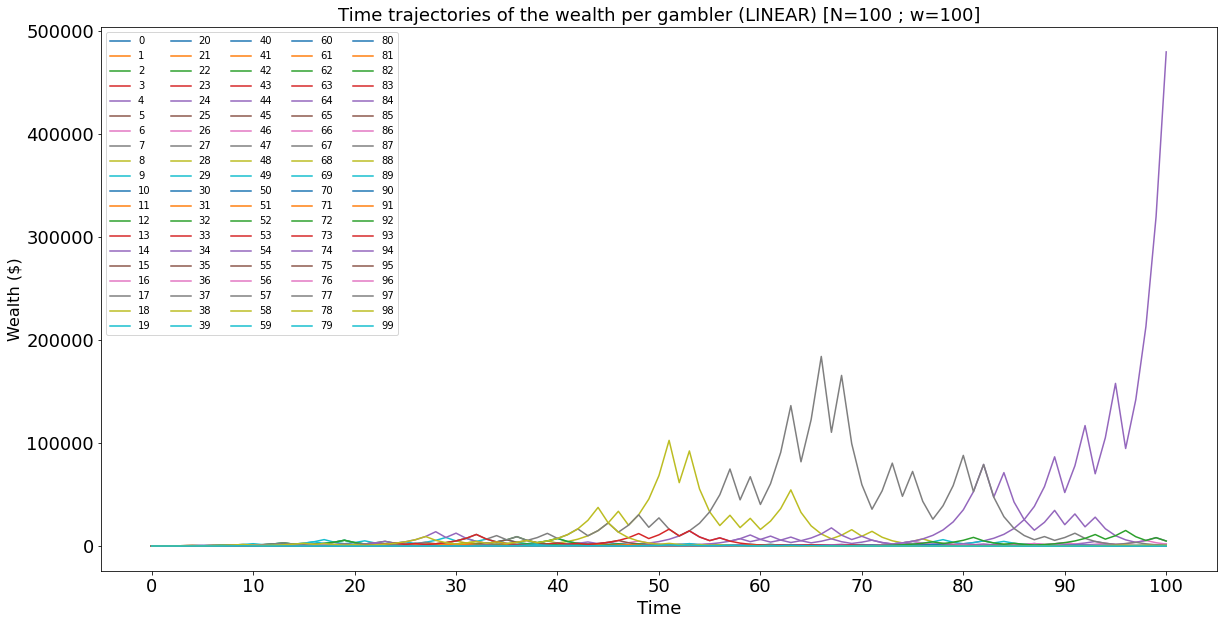

In [ ]:
fig = plt.figure(figsize=(20,10))
for i in range(0,100):
  plt.plot(balance_data.columns,balance_data.iloc[i],label=str(i))
plt.legend(loc='best',ncol=5)
plt.yscale('linear')
plt.title('Time trajectories of the wealth per gambler (LINEAR) [N=100 ; w=100]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.xticks(np.arange(0, 101, step=10))
plt.savefig('Fig_2.3.4_a_Desai_Ashutosh.png')

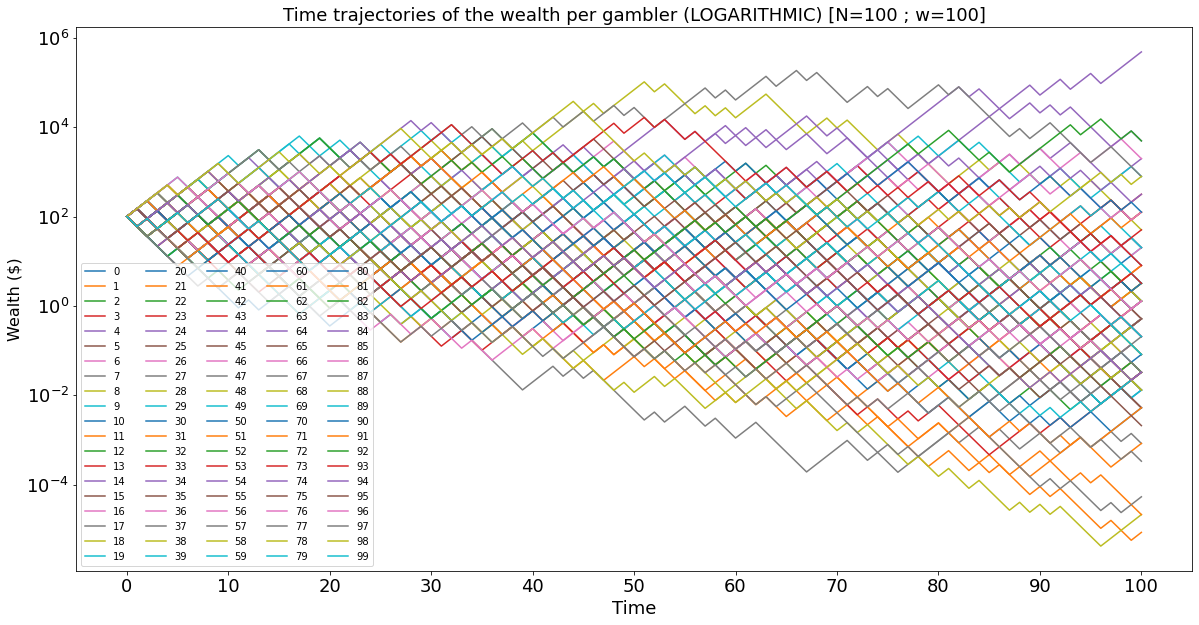

In [ ]:
fig = plt.figure(figsize=(20,10))
for i in range(0,100):
  plt.plot(balance_data.columns,balance_data.iloc[i],label=str(i))
plt.legend(loc='best',ncol=5)
plt.yscale('log')
plt.title('Time trajectories of the wealth per gambler (LOGARITHMIC) [N=100 ; w=100]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.xticks(np.arange(0, 101, step=10))
plt.savefig('Fig_2.3.4_b_Desai_Ashutosh.png')

In [ ]:
more_than_100 = []

In [ ]:
gamblers_win = []
for i in balance_data.iloc[:,-1]:
  if i > 100:
    gamblers_win.append(i)

In [ ]:
more_than_100.append(len(gamblers_win))
print('Number of gamblers with more than 100$ (initial wealth) : ',len(gamblers_win))

Number of gamblers with more than 100$ (initial wealth) :  15


####Now, we shall consider N=1000 and w=100

In [ ]:
#Defining N and w (general code)
N=1000 #columns
w=100 #rows

#Create a probablity dataframe for gamblers
gamble_prob_data = np.random.rand(w,N)
gamble_df = pd.DataFrame(data=gamble_prob_data, index=None, columns=None, dtype=None, copy=False)

#Iinitialize wealth and create a balance dataframe
initial_wealth = np.full((w, 1), 100)
balance_data = pd.DataFrame(data=initial_wealth,columns=['0'])

#Logic to populate the balance dataframe
for toss in range(0,N):
  temp_list = []
  for gambler in range(0,w):
    if gamble_df.iloc[gambler,toss] < 0.5:
      temp_list.append(balance_data.iloc[gambler,toss]*0.6)
    else:
      temp_list.append(balance_data.iloc[gambler,toss]*1.5)
  
  balance_data[str(toss+1)] = temp_list

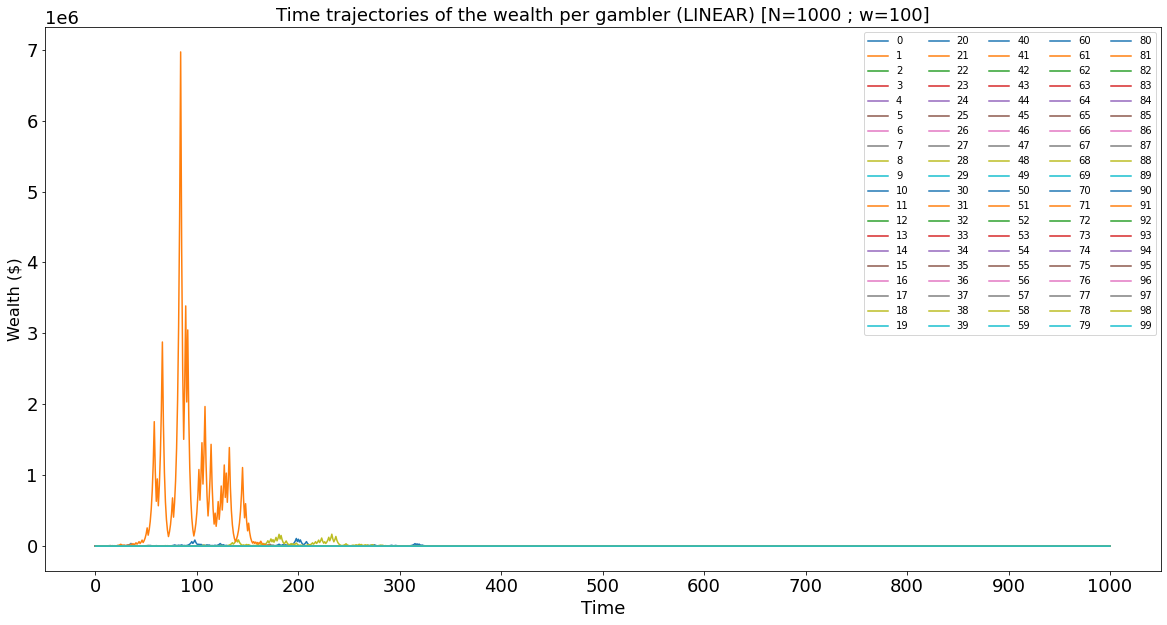

In [ ]:
#Linear plot of the wealth of gamblers
fig = plt.figure(figsize=(20,10))
for i in range(0,w):
  plt.plot(balance_data.columns,balance_data.iloc[i],label=str(i))
plt.legend(loc='best',ncol=5)
plt.yscale('linear')
plt.title('Time trajectories of the wealth per gambler (LINEAR) [N=1000 ; w=100]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.xticks(np.arange(0, N+1, step=N/10))
plt.savefig('Fig_2.3.4_c_Desai_Ashutosh.png')

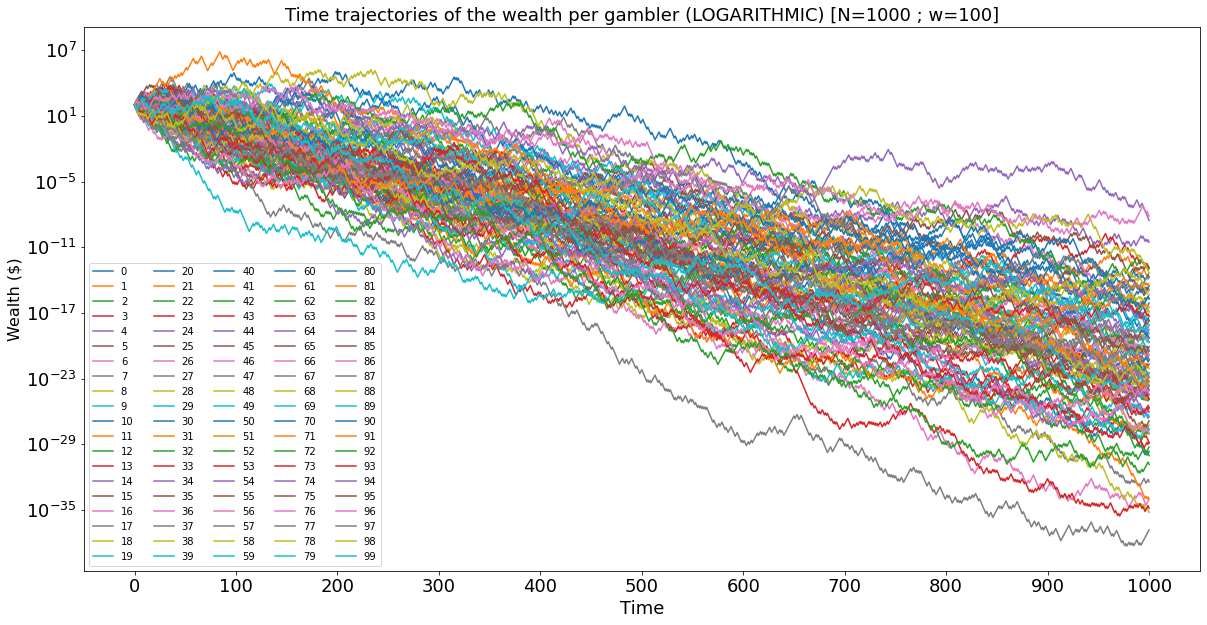

In [ ]:
#Logarithmic plot of the wealth of gamblers
fig = plt.figure(figsize=(20,10))
for i in range(0,100):
  plt.plot(balance_data.columns,balance_data.iloc[i],label=str(i))
plt.legend(loc='best',ncol=5)
plt.yscale('log')
plt.title('Time trajectories of the wealth per gambler (LOGARITHMIC) [N=1000 ; w=100]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.xticks(np.arange(0, N+1, step=N/10))
plt.savefig('Fig_2.3.4_d_Desai_Ashutosh.png')

It can be observed from the plot above that when the timline increased from 100 to 1000, there is a general trend towards the loss. In a scenario of a potential gain, when played enough times, there an overall loss observed with 0 gamblers having more than 100$ (their initial wealth). We observe a paradox here.

In [ ]:
gamblers_win = []
for i in balance_data.iloc[:,-1]:
  if i > 100:
    gamblers_win.append(i)

In [ ]:
more_than_100.append(len(gamblers_win))
print('Number of gamblers with more than 100$ (initial wealth) : ',len(gamblers_win))

Number of gamblers with more than 100$ (initial wealth) :  0


####5. Plot the time trajectories of the mean and median wealth at every time point from 0 to 1,000. Try both linear and logarithmic scaler for the wealth axis. What are your observations?

In [ ]:
temp_list1 = []
temp_list2 = []
for toss in range(0,N+1):
  temp_list1.append(balance_data[str(toss)].mean())
  temp_list2.append(balance_data[str(toss)].median())

In [ ]:
mean_val = np.array(temp_list1)
median_val = np.array(temp_list2)

In [ ]:
balance_data_mean = pd.DataFrame(data=mean_val,columns=['Mean'])
balance_data_mean['Median'] = median_val
balance_data_mean

,Mean,Median
0,1.000000e+02,1.000000e+02
1,1.014000e+02,6.000000e+01
2,1.116000e+02,9.000000e+01
3,1.221210e+02,1.350000e+02
4,1.346301e+02,8.100000e+01
...,...,...
996,4.427809e-10,1.044599e-22
997,2.659963e-10,1.096829e-22
998,2.790494e-10,6.580975e-23
999,1.677249e-10,8.179211e-23


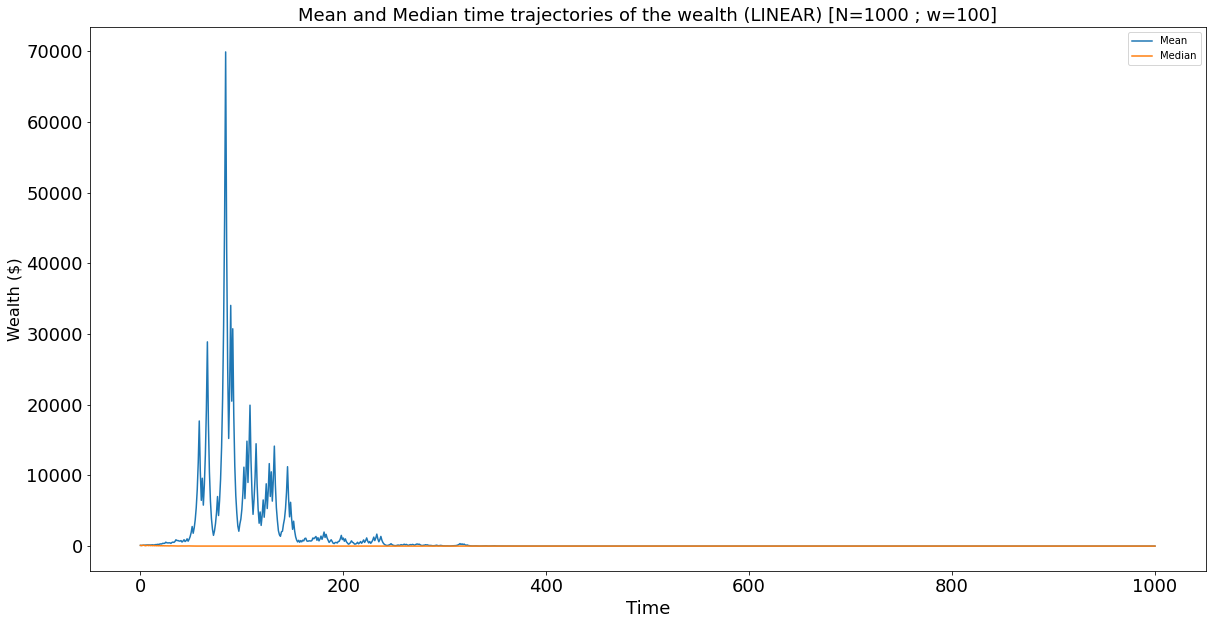

In [ ]:
#Linear plot of the wealth of gamblers
fig = plt.figure(figsize=(20,10))
plt.plot(balance_data_mean.index,balance_data_mean['Mean'],label='Mean')
plt.plot(balance_data_mean.index,balance_data_mean['Median'],label='Median')
plt.legend(loc='best')
plt.yscale('linear')
plt.title('Mean and Median time trajectories of the wealth (LINEAR) [N=1000 ; w=100]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.savefig('Fig_2.3.5_a_Desai_Ashutosh.png')

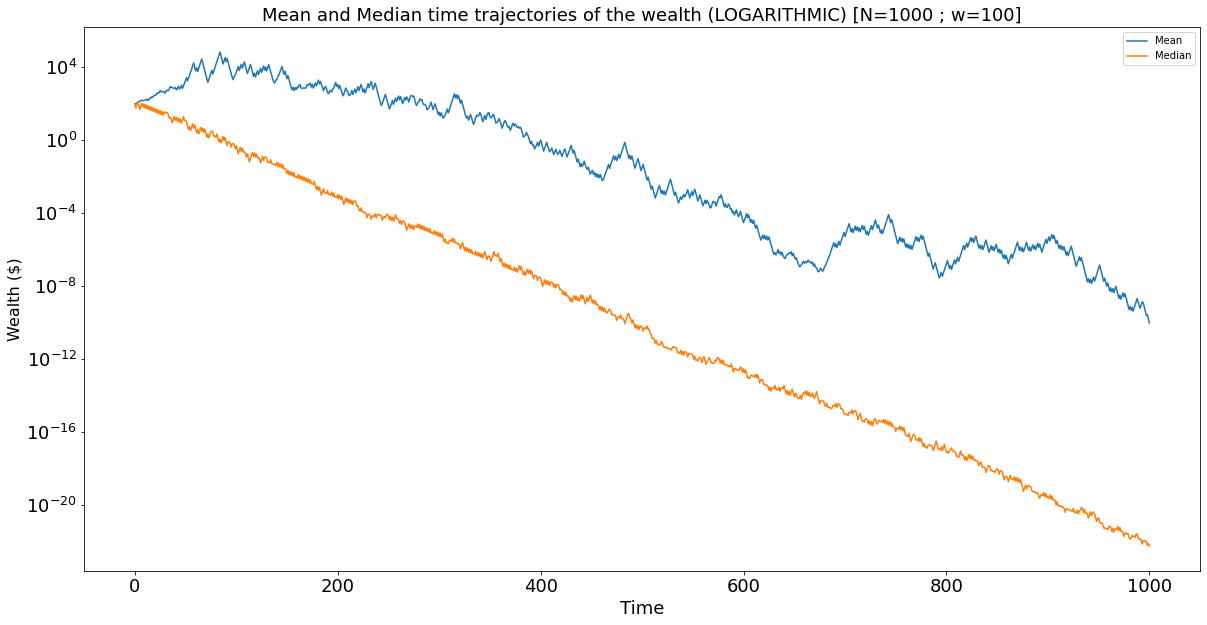

In [ ]:
#Linear plot of the wealth of gamblers
fig = plt.figure(figsize=(20,10))
plt.plot(balance_data_mean.index,balance_data_mean['Mean'],label='Mean')
plt.plot(balance_data_mean.index,balance_data_mean['Median'],label='Median')
plt.legend(loc='best')
plt.yscale('log')
plt.title('Mean and Median time trajectories of the wealth (LOGARITHMIC) [N=1000 ; w=100]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.savefig('Fig_2.3.5_b_Desai_Ashutosh.png')

Both mean and the median move close to zero at the 100th time. The median experiences a steeper negative slope than the mean.

####6. Repeat steps 3-5 with N=10 and w=1,000 with the following logic:

In [ ]:
#Defining N and w (general code)
N=10 #columns
w=1000 #rows

#Create a probablity dataframe for gamblers
gamble_prob_data = np.random.rand(w,N)
gamble_df = pd.DataFrame(data=gamble_prob_data, index=None, columns=None, dtype=None, copy=False)

#Iinitialize wealth and create a balance dataframe
initial_wealth = np.full((w, 1), 100)
balance_data = pd.DataFrame(data=initial_wealth,columns=['0'])

#Logic to populate the balance dataframe
for toss in range(0,N):
  temp_list = []
  for gambler in range(0,w):
    if gamble_df.iloc[gambler,toss] < 0.5:
      temp_list.append(balance_data.iloc[gambler,toss]-40)
    else:
      temp_list.append(balance_data.iloc[gambler,toss]+50)
  
  balance_data[str(toss+1)] = temp_list

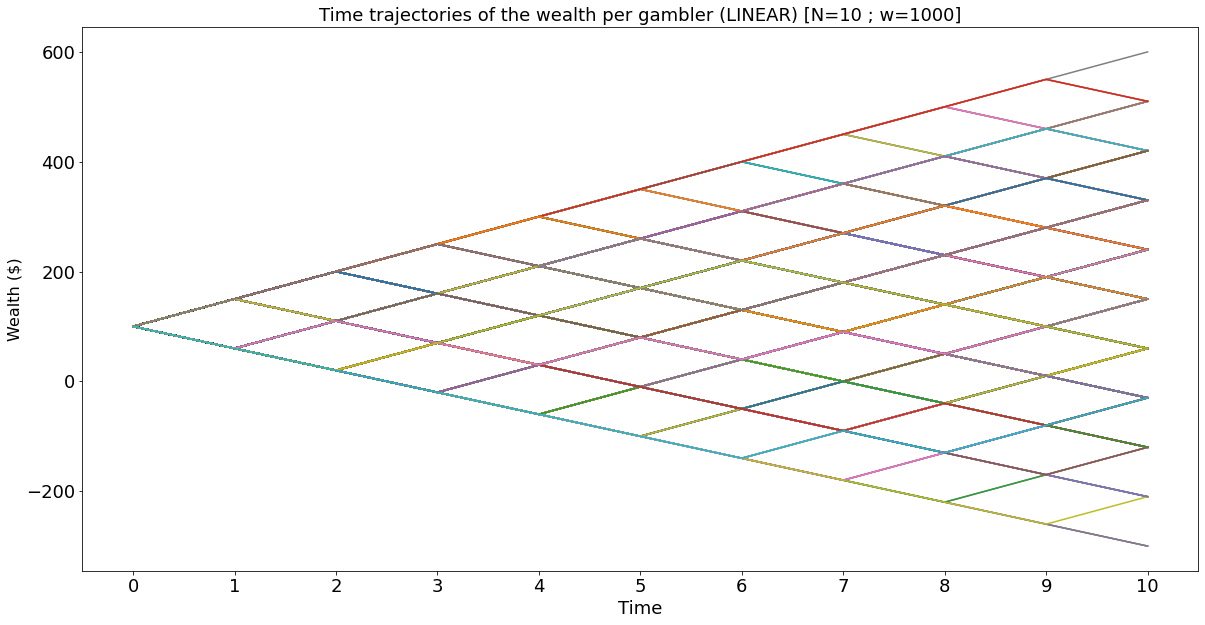

In [ ]:
#Linear plot of the wealth of gamblers
fig = plt.figure(figsize=(20,10))
for i in range(0,w):
  plt.plot(balance_data.columns,balance_data.iloc[i],label=str(i))
#plt.legend(loc='best',ncol=5)
plt.yscale('linear')
plt.title('Time trajectories of the wealth per gambler (LINEAR) [N=10 ; w=1000]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.savefig('Fig_2.3.6_a_Desai_Ashutosh.png')

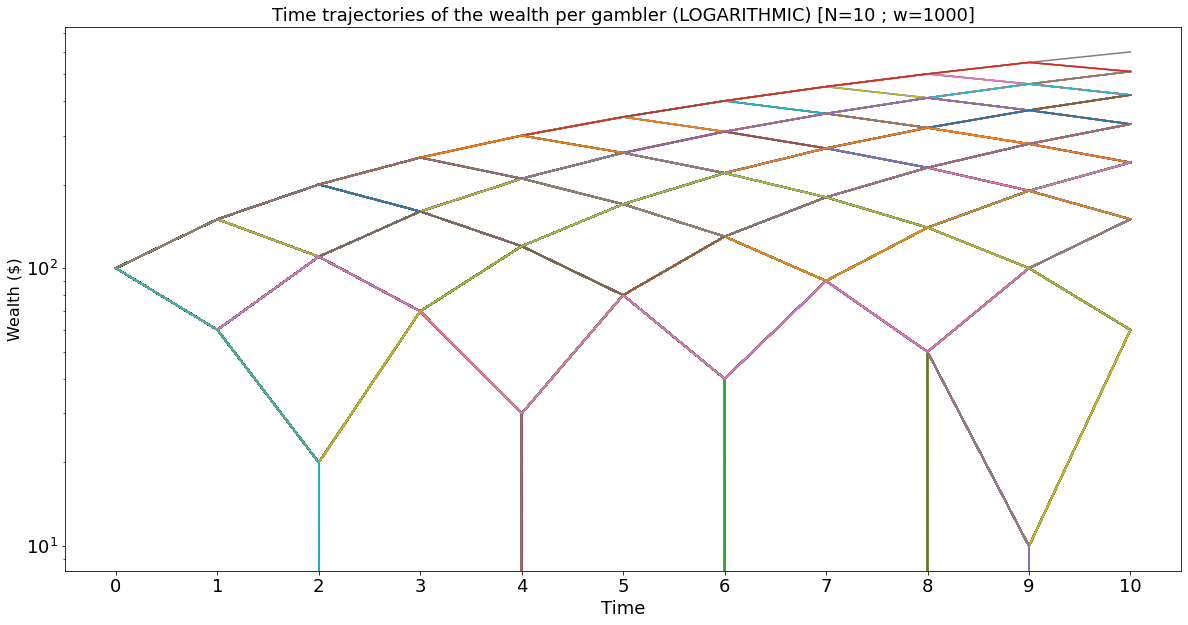

In [ ]:
#Logarithmic plot of the wealth of gamblers
fig = plt.figure(figsize=(20,10))
for i in range(0,w):
  plt.plot(balance_data.columns,balance_data.iloc[i],label=str(i))
#plt.legend(loc='best',ncol=5)
plt.yscale('log')
plt.title('Time trajectories of the wealth per gambler (LOGARITHMIC) [N=10 ; w=1000]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.savefig('Fig_2.3.6_b_Desai_Ashutosh.png')

In [ ]:
temp_list1 = []
temp_list2 = []
for toss in range(0,N+1):
  temp_list1.append(balance_data[str(toss)].mean())
  temp_list2.append(balance_data[str(toss)].median())


mean_val = np.array(temp_list1)
median_val = np.array(temp_list2)

balance_data_mean = pd.DataFrame(data=mean_val,columns=['Mean'])
balance_data_mean['Median'] = median_val
balance_data_mean

,Mean,Median
0,100.00,100.0
1,104.37,60.0
2,111.62,110.0
3,114.64,160.0
4,121.26,120.0
5,126.62,80.0
6,131.80,130.0
7,136.17,180.0
8,143.78,140.0
9,149.41,190.0


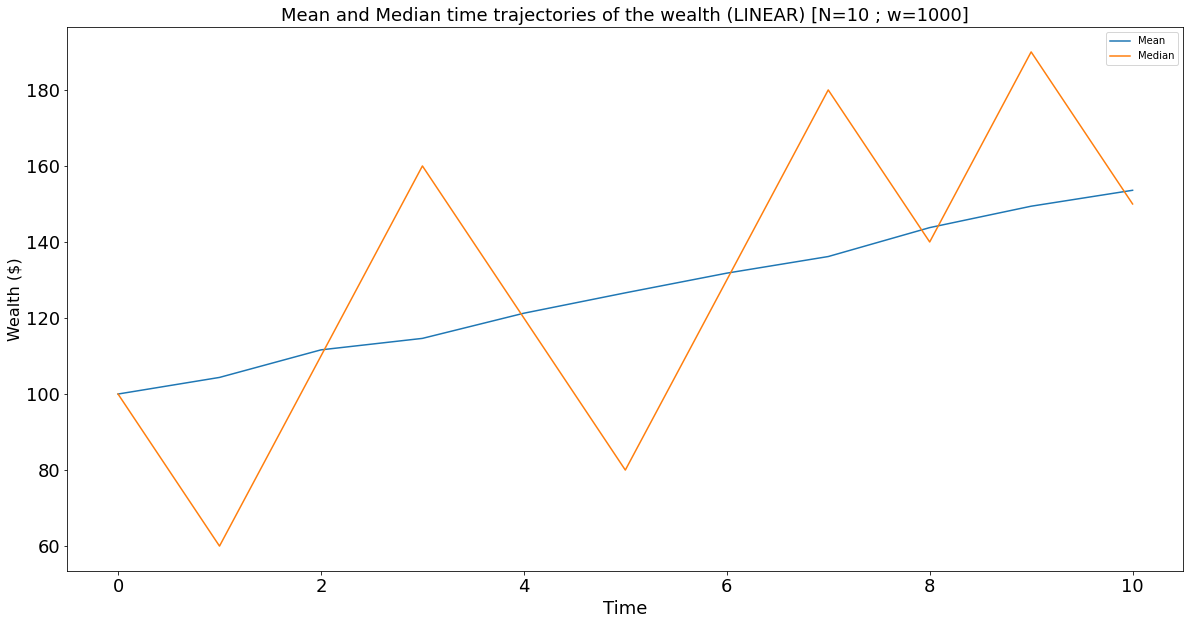

In [ ]:
#Linear plot of the wealth of gamblers
fig = plt.figure(figsize=(20,10))
plt.plot(balance_data_mean.index,balance_data_mean['Mean'],label='Mean')
plt.plot(balance_data_mean.index,balance_data_mean['Median'],label='Median')
plt.legend(loc='best')
plt.yscale('linear')
plt.title('Mean and Median time trajectories of the wealth (LINEAR) [N=10 ; w=1000]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.savefig('Fig_2.3.6_c_Desai_Ashutosh.png')

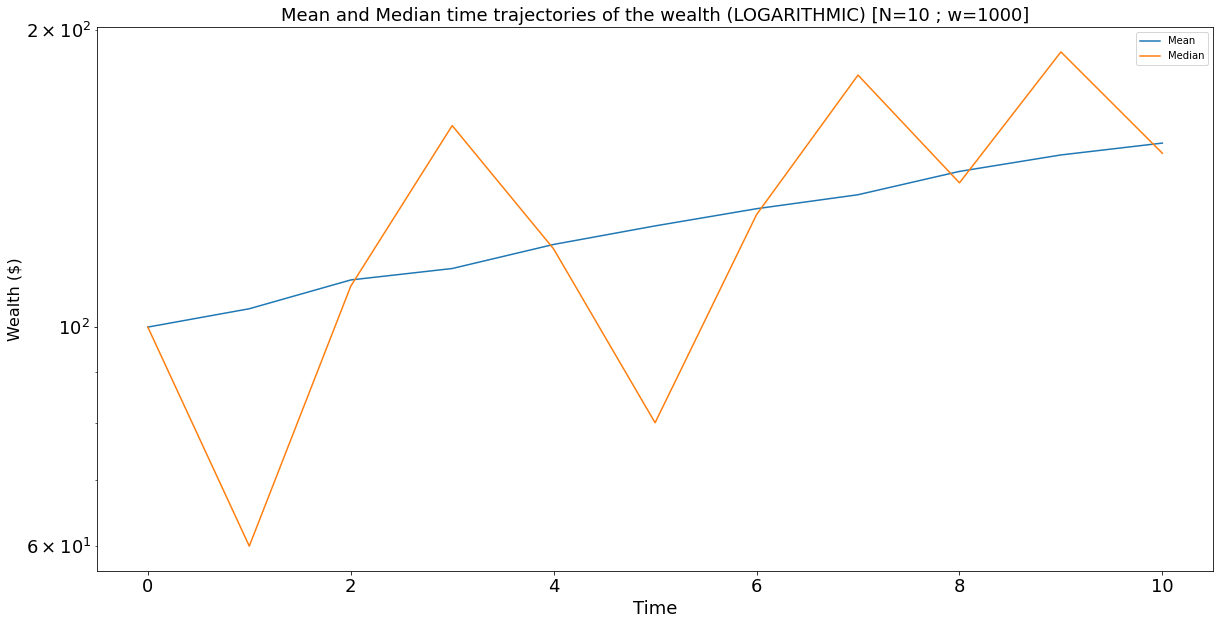

In [ ]:
#Linear plot of the wealth of gamblers
fig = plt.figure(figsize=(20,10))
plt.plot(balance_data_mean.index,balance_data_mean['Mean'],label='Mean')
plt.plot(balance_data_mean.index,balance_data_mean['Median'],label='Median')
plt.legend(loc='best')
plt.yscale('log')
plt.title('Mean and Median time trajectories of the wealth (LOGARITHMIC) [N=10 ; w=1000]',fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Wealth ($)', fontsize=16)
plt.savefig('Fig_2.3.6_d_Desai_Ashutosh.png')

The results observed in 2.3.6 are different than observed in 2.3.6. 

1.) All the plots have solid lines without any disturbance or noise. This is because the logic has a fixed addition and substraction of the balance after every toss.

2.) A high volume of gamblers are with a balance greater than 100$. This is because the number of gamblers have increased and the timeline has been reduced.

3.) Mean has a gradual positive slope whereas the median has a zig-zag profile due to the definite balance change for all the gamblers.

In [ ]:
gamblers_win = []
for i in balance_data.iloc[:,-1]:
  if i > 100:
    gamblers_win.append(i)
more_than_100.append(len(gamblers_win))
print('Number of gamblers with more than 100$ (initial wealth) : ',len(gamblers_win))

Number of gamblers with more than 100$ (initial wealth) :  627


In [ ]:
win_data = pd.DataFrame()

In [ ]:
win_data['N'] = [100,1000,10]
win_data['w'] = [100,100,1000]
win_data['Gamblers above 100$'] = more_than_100

In [ ]:
win_data

,N,w,Gamblers above 100$
0,100,100,15
1,1000,100,0
2,10,1000,627
